In [1]:
import os

import tensorflow as tf
import sewar.full_ref
from tqdm import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt

import src.model
import src.utils
import src.vizualization

In [2]:
BASE_RESULT_PATH = os.path.join("images", "results")
BASE_TRAINER_PATH = os.path.join("images", "trainers")

style_image_path = os.path.join("images", "styles", "profilowe.jpg")
content_image_path = os.path.join("images", "contents", "origami_dragon.jpg")

style_image = src.utils.tf_utils.load_img(style_image_path)
content_image = src.utils.tf_utils.load_img(content_image_path)


In [22]:
trainers= []
trainers_num = 16

for _ in tqdm(range(trainers_num)):
    trainer = src.model.NSTImageTrainer.from_layers_selectors(
            style_image,
            content_image,
            src.utils.randomizers.random_length_normal_choices,
            src.utils.randomizers.normal_choice,
            trainer_kw = dict(total_variation_weight=30),
            style_layers_selector_kw = dict(min_output_elements_num=2, rel_loc=0.05, rel_scale=0.25), 
            content_layers_selector_kw = dict(rel_loc=0.5, rel_scale=0.26)
        )
    trainer.compile(tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1))
    trainers.append(trainer)

100%|██████████| 16/16 [00:36<00:00,  2.27s/it]


In [23]:
selectioner = src.model.TraintersSelectioner(trainers)

In [24]:

def plot_trainters():
    src.vizualization.plot_trained_images(selectioner.trainers)
    plt.show()

callbacks = [clear_output, plot_trainters]

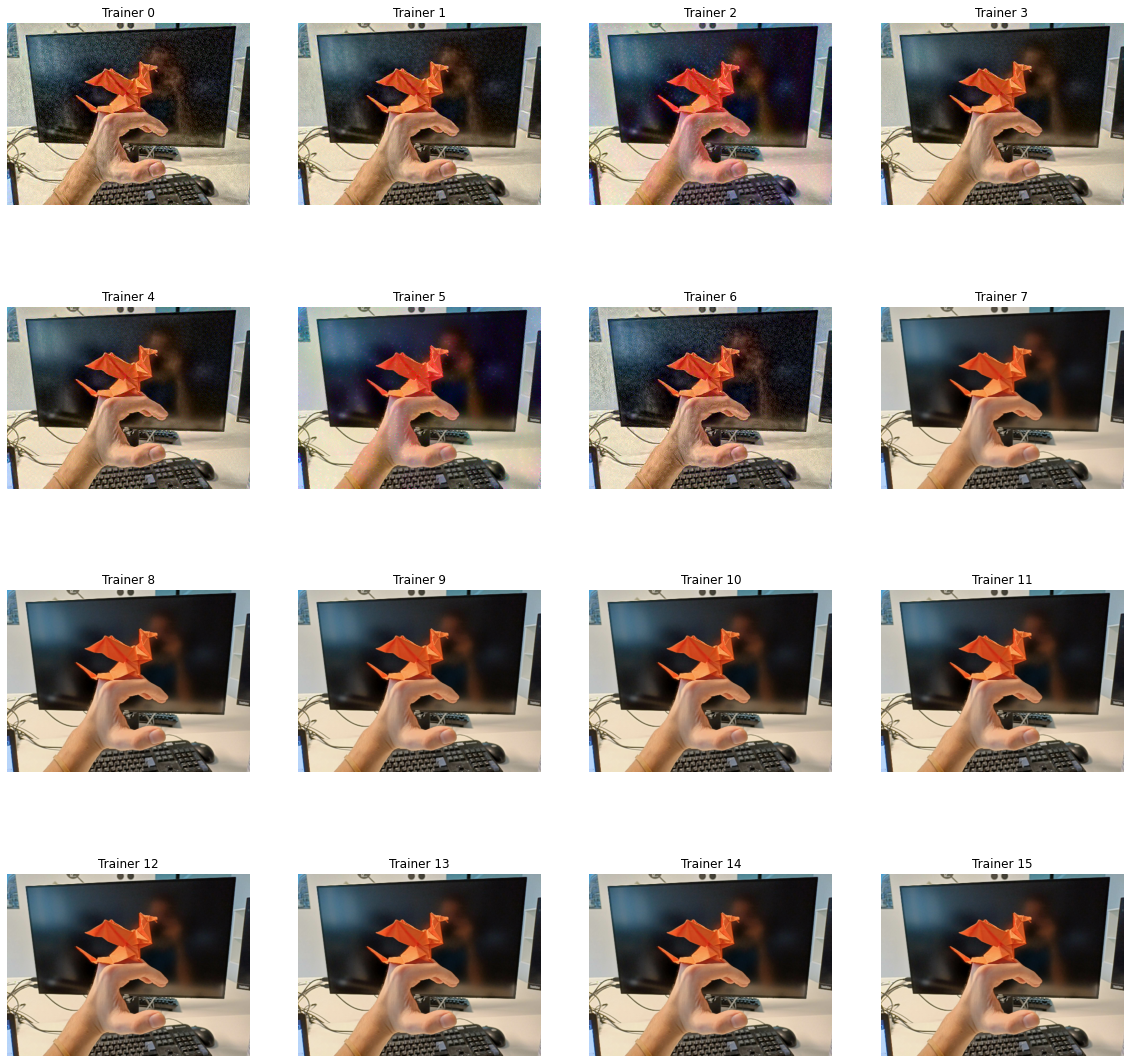

Traing for trainer 8 from 16
Epoch 1/1:


 13%|█▎        | 4/30 [00:09<00:59,  2.31s/it]


KeyboardInterrupt: 

In [26]:

selectioner.train(epochs=1, steps=30, callbacks=callbacks)
selectioner.save_history()
selectioner.sort_trainers_by_differences(sewar.full_ref.mse)
clear_output()
src.vizualization.plot_trained_images(selectioner.trainers)
selectioner.remove_second_half_trainers()



In [ ]:

selectioner.train(epochs=1, steps=30, callbacks=callbacks)
selectioner.save_history()
selectioner.sort_trainers_by_differences(sewar.full_ref.mse)
clear_output()
src.vizualization.plot_trained_images(selectioner.trainers)
selectioner.remove_second_half_trainers()



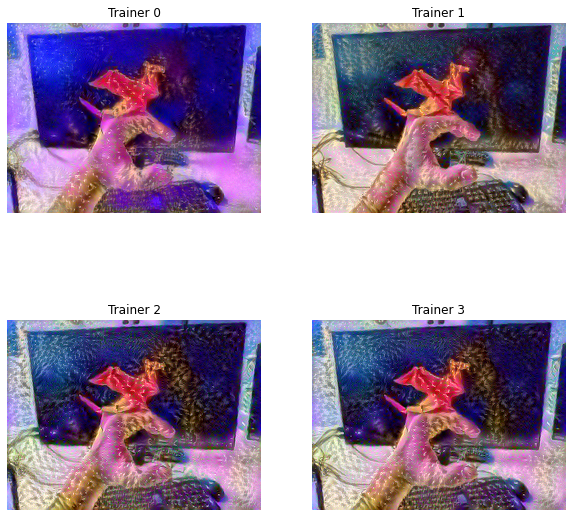

In [ ]:
selectioner.train(epochs=1, steps=30, callbacks=callbacks)
selectioner.save_history()
selectioner.sort_trainers_by_differences(sewar.full_ref.mse)
clear_output()
src.vizualization.plot_trained_images(selectioner.trainers)
selectioner.remove_second_half_trainers()


In [ ]:
assert False

AssertionError: 

In [ ]:
################ HISTORY TRAINING #######################


# multi_trainer.history[0][4].training_loop(30, 16)
# multi_trainer.history[0][4].output_image

# src.vizualization.save_vizualizations(
#     multi_trainer.history[0][4],
#     style_image_path,
#     content_image_path,
#     BASE_RESULT_PATH,
#     BASE_TRAINER_PATH
# )



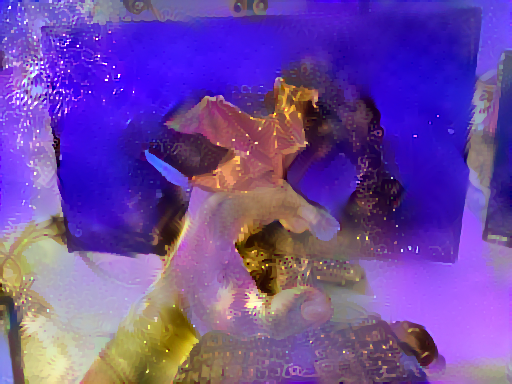

In [ ]:
trainer_idx = 0
selectioner.trainers[trainer_idx].training_loop(epochs=2, steps_per_epoch=30)
clear_output()
selectioner.trainers[trainer_idx].output_image

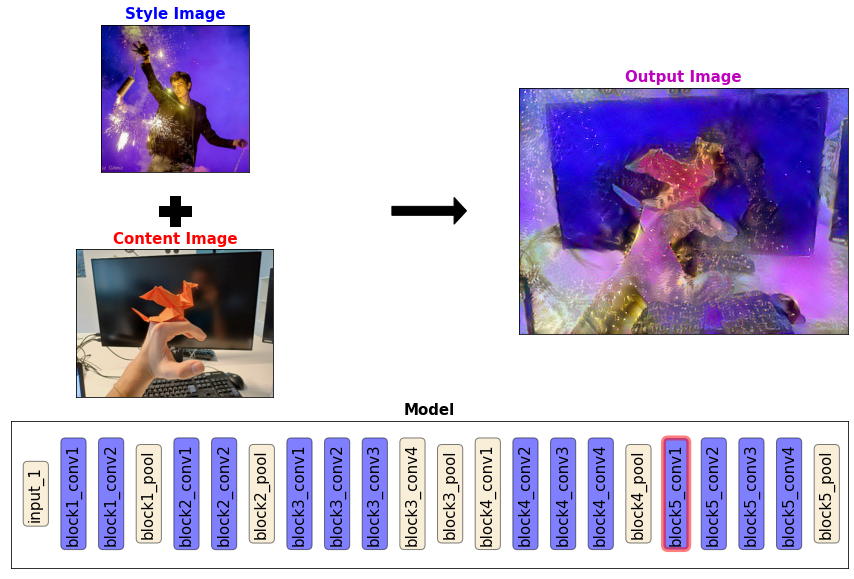

In [ ]:
src.vizualization.plot_trainer(selectioner.trainers[0])

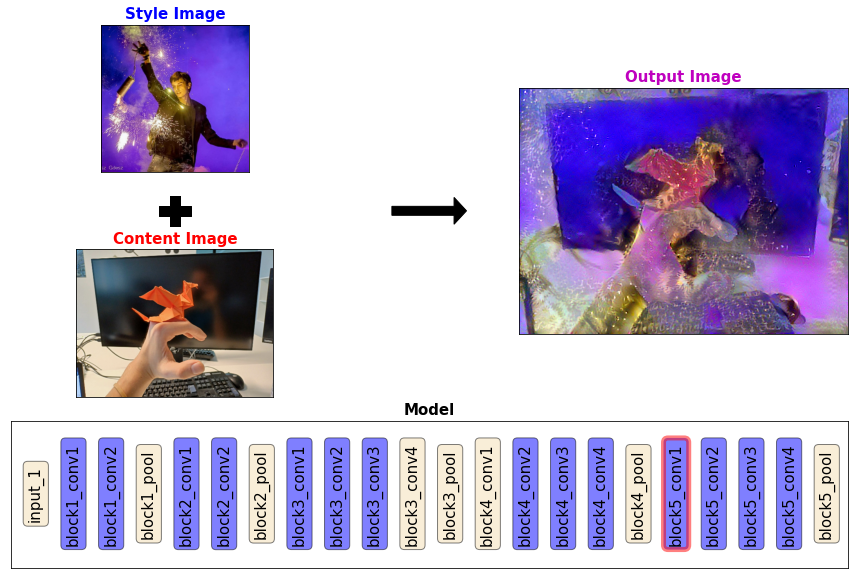

In [ ]:
src.vizualization.save_vizualizations(
    selectioner.trainers[0],
    style_image_path,
    content_image_path,
    BASE_RESULT_PATH,
    BASE_TRAINER_PATH
)


### Models layers

In [ ]:
assert False

(ListWrapper(['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1']),
 ListWrapper(['block5_conv2']))

(ListWrapper(['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1']),
 ListWrapper(['block5_conv2']))

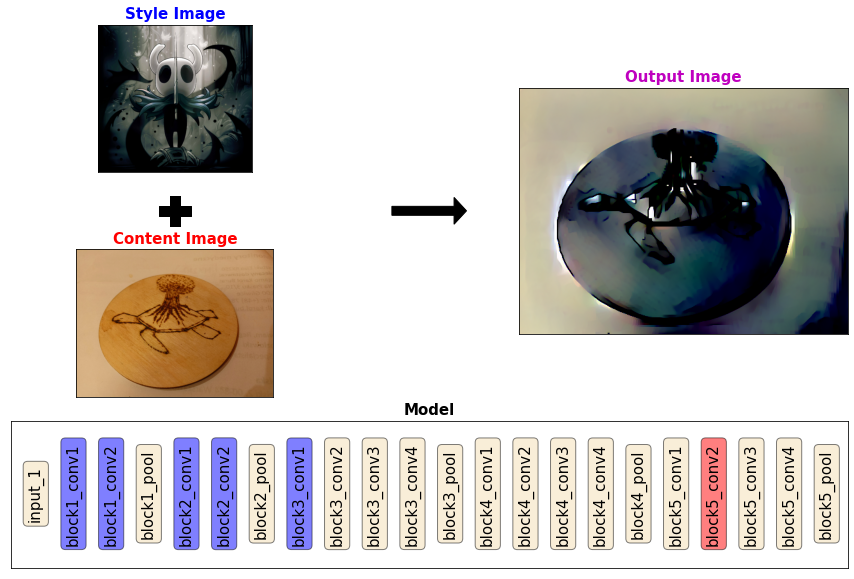

In [ ]:
src.vizualization.plot_trainer(selectioner.trainers[0])
selectioner.trainers[0].style_layers, selectioner.trainers[0].content_layers

In [ ]:
# multi_trainer.trainers[0].output_image


(ListWrapper(['block3_conv1', 'block4_conv1', 'block4_conv3', 'block5_conv4']),
 ListWrapper(['block4_conv4']))

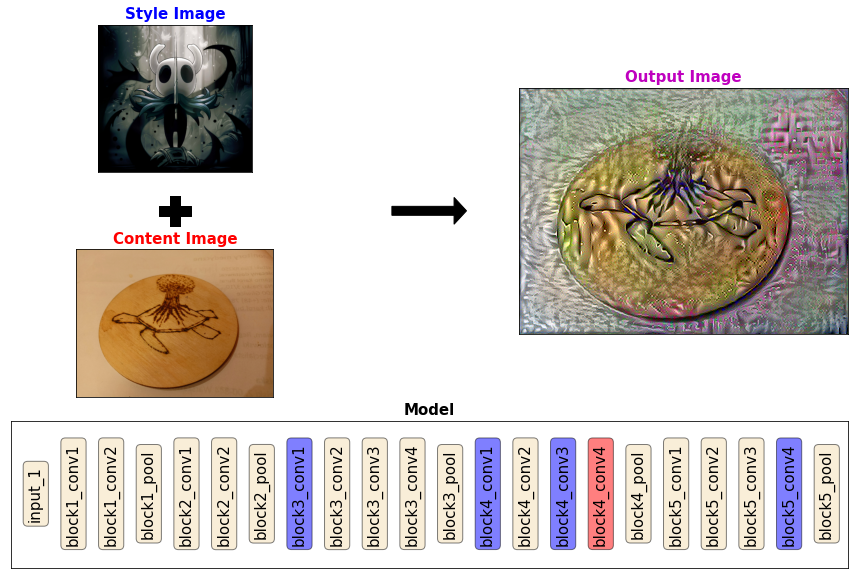

In [ ]:
src.vizualization.plot_trainer(selectioner.trainers[1])
selectioner.trainers[1].style_layers, selectioner.trainers[1].content_layers

(ListWrapper(['block1_conv1', 'block1_conv2', 'block2_conv2', 'block4_conv3', 'block5_conv4']),
 ListWrapper(['block3_conv1']))

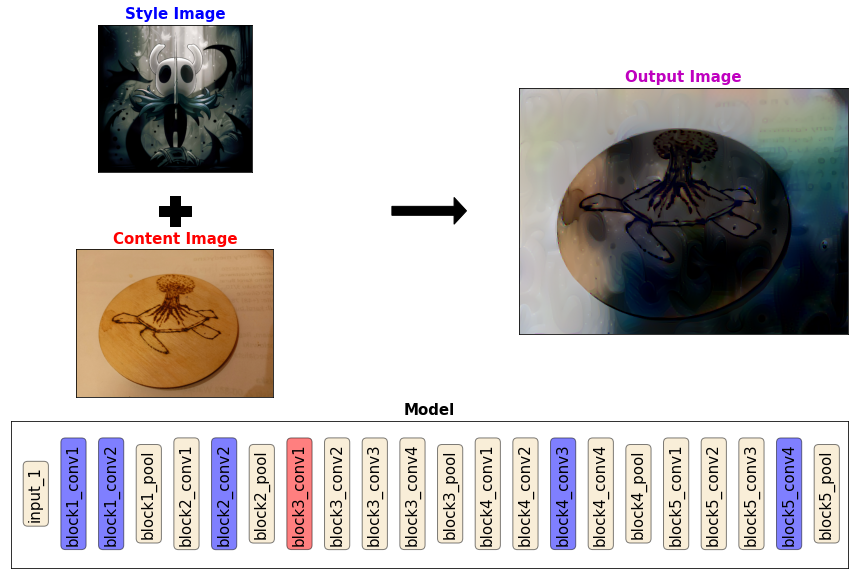

In [ ]:
src.vizualization.plot_trainer(selectioner.trainers[2])
selectioner.trainers[2].style_layers, selectioner.trainers[2].content_layers

(ListWrapper(['block2_conv2', 'block3_conv1', 'block4_conv2', 'block4_conv4']),
 ListWrapper(['block3_conv4']))

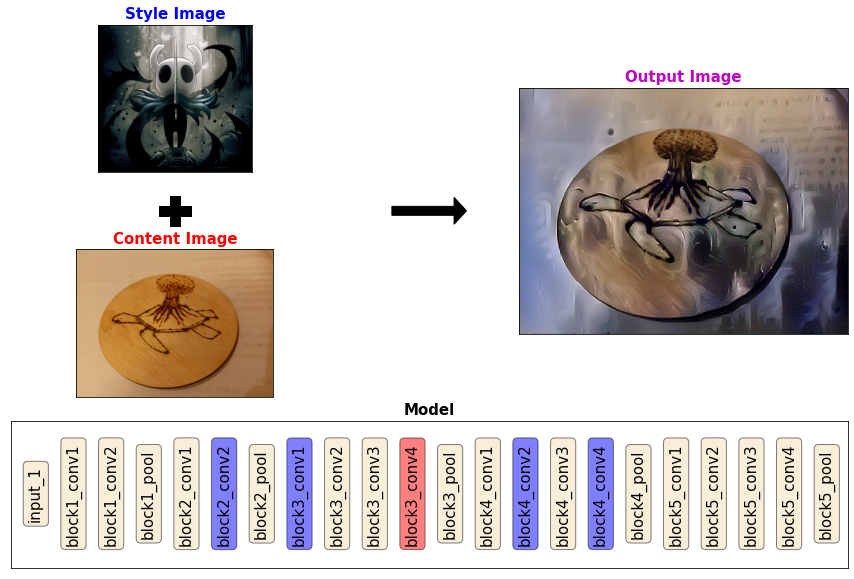

In [ ]:
src.vizualization.plot_trainer(selectioner.trainers[3])
selectioner.trainers[3].style_layers, selectioner.trainers[3].content_layers